Воробьев Андрей Павлович, 465440, J3111

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Анализируемая функция:
$$f(x) = \sqrt{e^x} + 4x$$
на отрезке $[a, b] = [0, 2]$


In [2]:
def f(x):
    return np.sqrt(np.exp(x)) + 4 * x


a_test = 0
b_test = 10
a = 0
b = 2
n_list = [4, 8, 16, 1000]

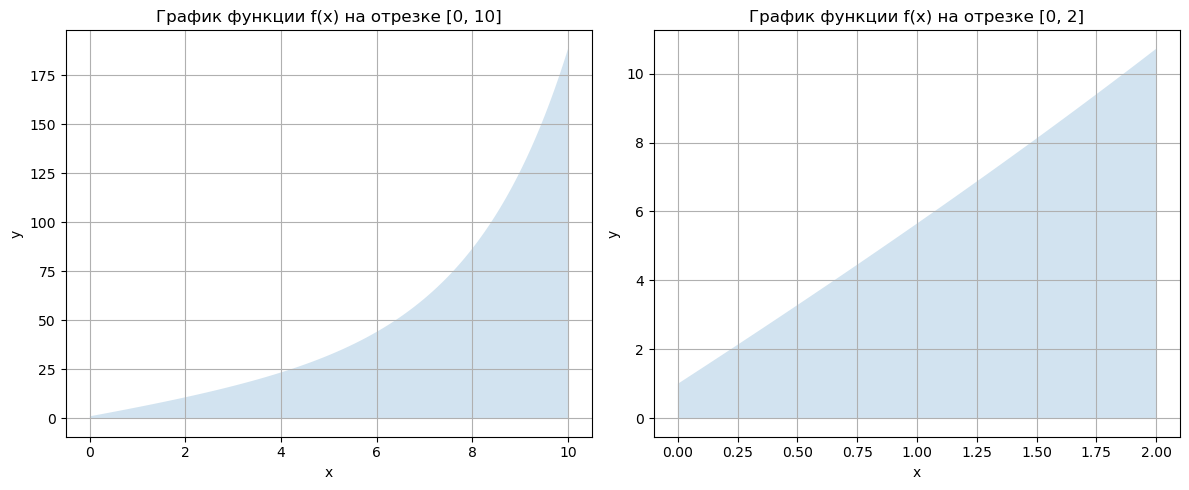

In [3]:
plt.figure(figsize=(12, 5))

x_test = np.linspace(a_test, b_test, 1000)
plt.subplot(1, 2, 1)
plt.fill_between(x_test, f(x_test), alpha=0.2)
plt.title(f"График функции f(x) на отрезке [{a_test}, {b_test}]")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()

x = np.linspace(a, b, 1000)
plt.subplot(1, 2, 2)
plt.fill_between(x, f(x), alpha=0.2)
plt.title(f"График функции f(x) на отрезке [{a}, {b}]")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()

plt.tight_layout()

Точное значение интеграла на отрезке

In [4]:
true_value = 2 * np.e + 6
print("Точное значение интеграла на отрезке [0, 2] =", true_value)

true_value_0_10 = 2 * np.exp(5) + 198
print("Точное значение интеграла на отрезке [0, 10] =", true_value_0_10)

Точное значение интеграла на отрезке [0, 2] = 11.43656365691809
Точное значение интеграла на отрезке [0, 10] = 494.8263182051532


Разбить промежуток $[a, b]$ на $n$ равных конгруэнтных отрезков $\Delta_i = [x_{i-1}, x_i]$, таких что $|\Delta_i| = |x_i - x_{i-1}|$.

(для желающих рекомендуем сделать поддержку не конгруэнтного разбиения,
с регулировкой параметра разбиения).

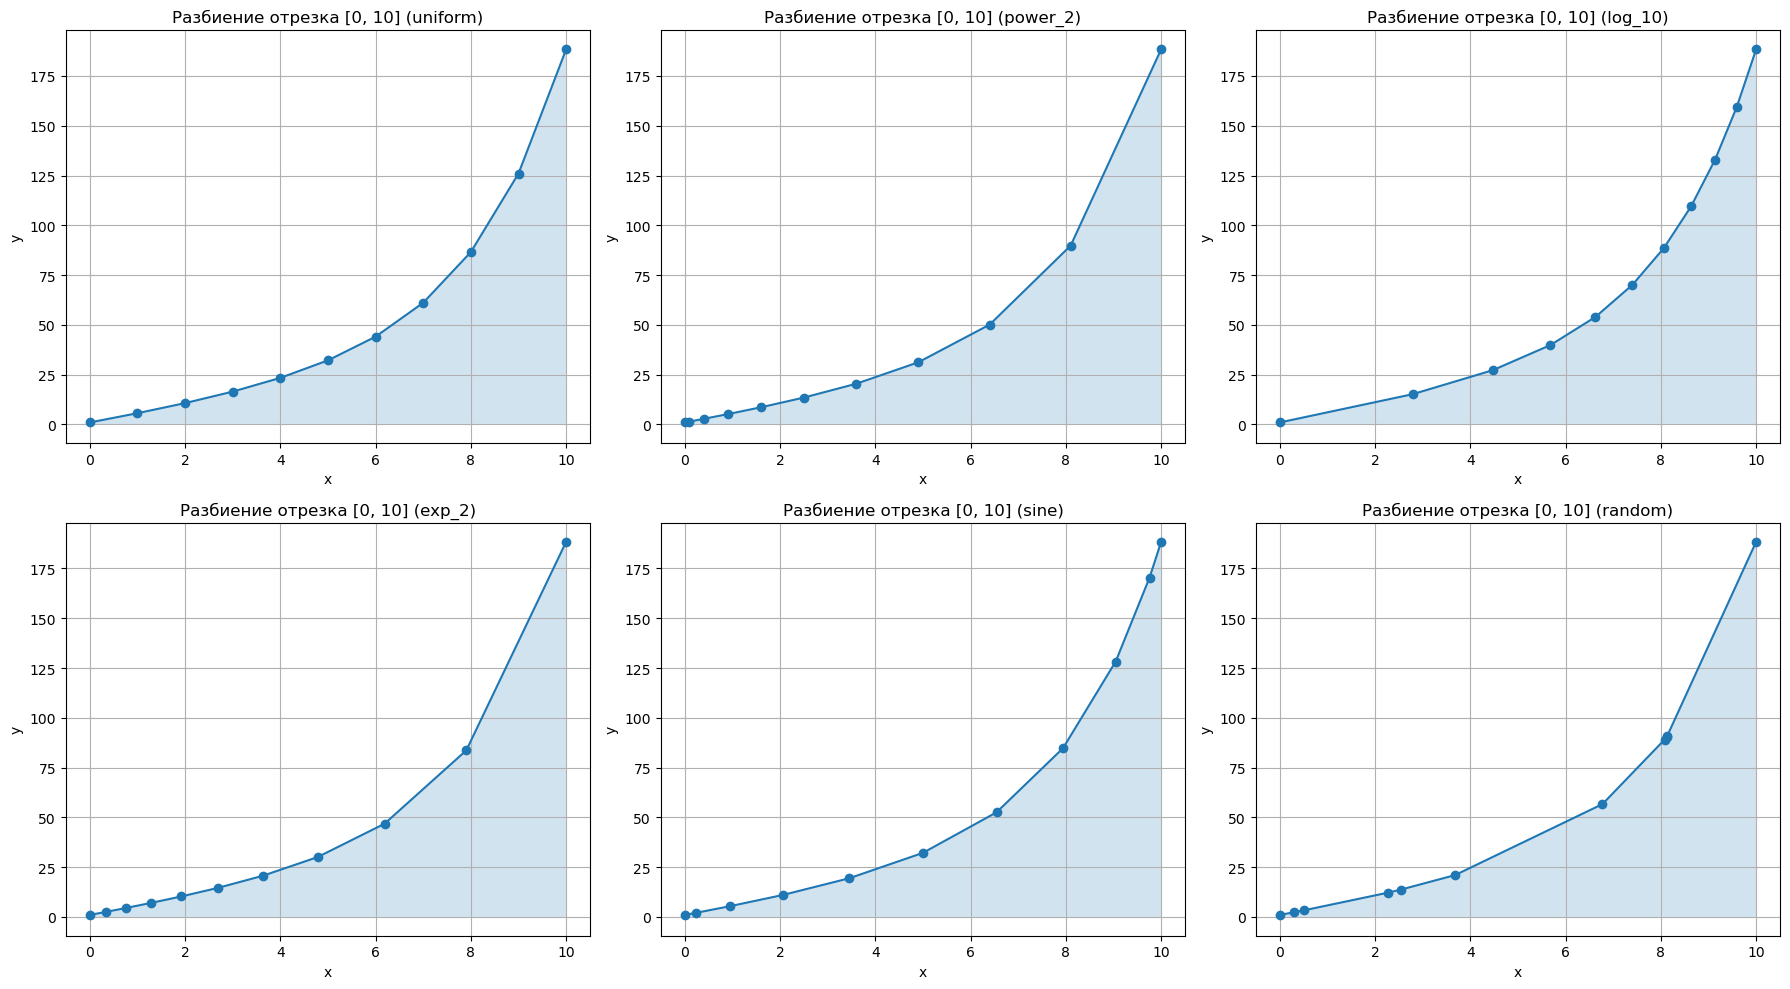

In [5]:
def get_partition(a, b, n=10, type='uniform', **kwargs):
    """
    Функция для получения разбиения отрезка [a, b] на n равных отрезков
    :param a: Начало отрезка
    :param b: Конец отрезка
    :param n: Размер разбиения
    :param type: Тип разбиения:
        uniform (равномерное),
        power (степенное),
        log (логарифмическое),
        exp (экспоненциальное),
        sine (синусоидальное),
        random (случайное)
    :param kwargs: Дополнительные параметры для разбиения:
        alpha (для power),
        rate (для exp),
        base (для log)
    :return: Массив точек разбиения длиной n + 1
    """
    t = np.linspace(0, 1, n + 1)

    if type == "uniform":
        x = t
    elif type == "power":
        alpha = kwargs.get("alpha", 2.0)
        x = t ** alpha
    elif type == "log":
        base = kwargs.get("base", 10)
        log_t = np.linspace(1, base, n + 1)
        x = np.log(log_t) / np.log(base)
    elif type == "exp":
        rate = kwargs.get("rate", 2.0)
        x = (np.exp(rate * t) - 1) / (np.exp(rate) - 1)
    elif type == "sine":
        x = (1 - np.cos(np.pi * t)) / 2
    elif type == "random":
        x = np.sort(np.random.rand(n - 1))
        x = np.concatenate([[0], x, [1]])

    return a + (b - a) * x


partitions = {
    "uniform": get_partition(a_test, b_test, type="uniform"),
    "power_2": get_partition(a_test, b_test, type="power", alpha=2),
    "log_10": get_partition(a_test, b_test, type="log", base=10),
    "exp_2": get_partition(a_test, b_test, type="exp", rate=2),
    "sine": get_partition(a_test, b_test, type="sine"),
    "random": get_partition(a_test, b_test, type="random"),
}

plt.figure(figsize=(18, 10))
for i, (name, x) in enumerate(partitions.items()):
    plt.subplot(2, 3, i + 1)
    plt.plot(x, f(x), 'o-')
    plt.fill_between(x, f(x), alpha=0.2)
    plt.title(f"Разбиение отрезка [{a_test}, {b_test}] ({name})")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid()
plt.tight_layout()

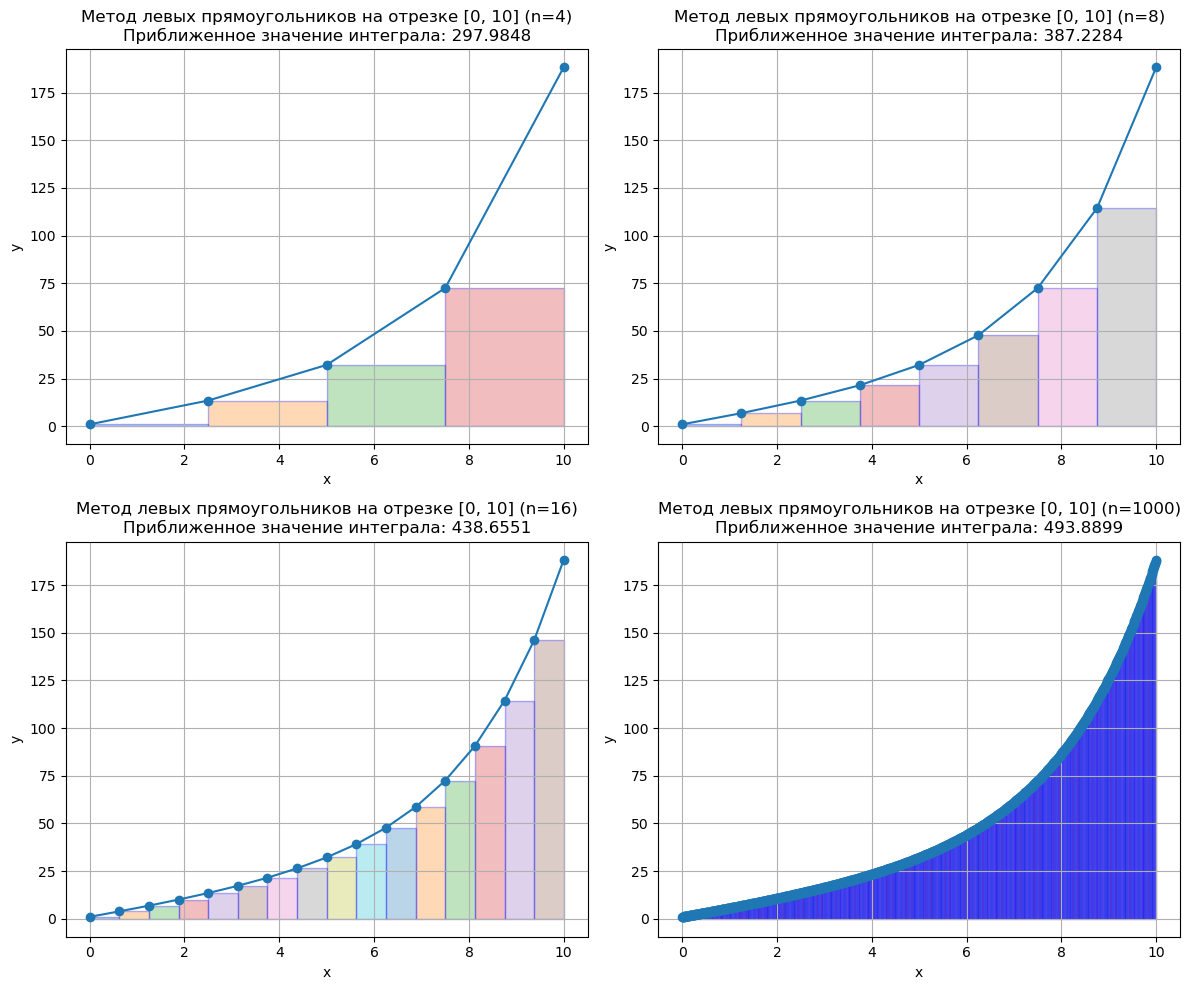

In [15]:
def integral_left_rectangle(f, a, b, n_list, plot=False, **kwargs):
    """
    Метод левых прямоугольников
    :param f: Функция
    :param a: Начало отрезка
    :param b: Конец отрезка
    :param n_list: Список размеров разбиений
    :param plot: Флаг для построения графика
    :param kwargs: Дополнительные параметры для разбиения
    :return: Список приближённых значений интеграла для каждого n
    """
    result = []
    if plot:
        plt.figure(figsize=(12, 10))

    for n in n_list:
        x = get_partition(a, b, n, **kwargs)
        integral = 0
        for i in range(n):
            integral += f(x[i]) * (x[i + 1] - x[i])
        result.append(integral)

        if plot:
            plt.subplot(2, 2, n_list.index(n) + 1)
            plt.plot(x, f(x), 'o-')
            for i in range(n):
                x_left = x[i]
                x_right = x[i + 1]
                y_val = f(x_left)
                X_rect = [x_left, x_right, x_right, x_left, x_left]
                Y_rect = [0, 0, y_val, y_val, 0]
                plt.fill(X_rect, Y_rect, alpha=0.3, edgecolor='b')
            plt.title(f"Метод левых прямоугольников на отрезке [{a}, {b}] (n={n})\n"
                      f"Приближенное значение интеграла: {integral:.4f}")
            plt.xlabel("x")
            plt.ylabel("y")
            plt.grid()
    if plot:
        plt.tight_layout()
    return result


result_left_test = integral_left_rectangle(f, a_test, b_test, n_list, plot=True)

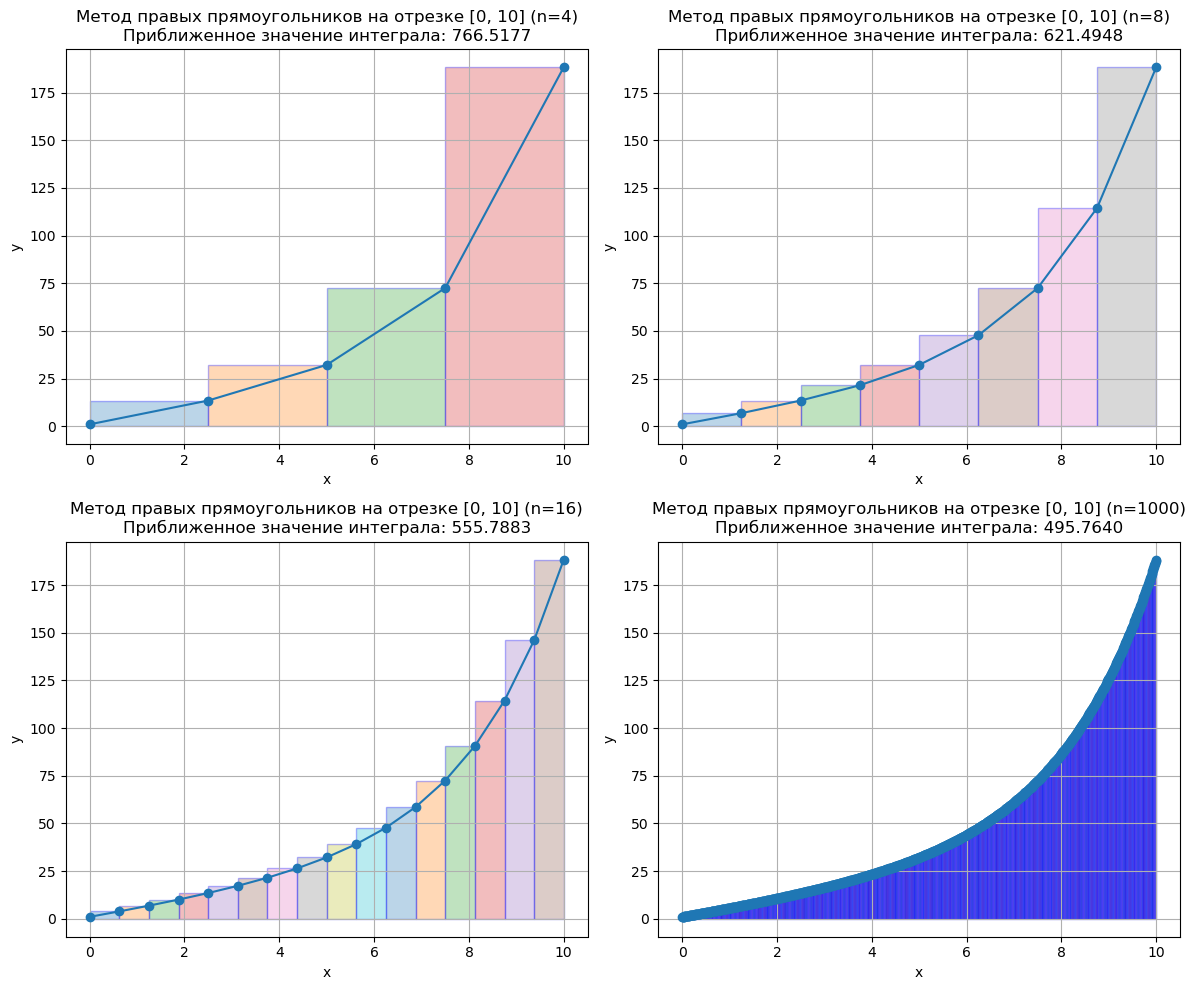

In [16]:
def integral_right_rectangle(f, a, b, n_list, plot=False, **kwargs):
    """
    Метод правых прямоугольников
    :param f: Функция
    :param a: Начало отрезка
    :param b: Конец отрезка
    :param n_list: Список размеров разбиений
    :param plot: Флаг для построения графика
    :param kwargs: Дополнительные параметры для разбиения
    :return: Список приближённых значений интеграла для каждого n
    """
    result = []
    if plot:
        plt.figure(figsize=(12, 10))

    for n in n_list:
        x = get_partition(a, b, n, **kwargs)
        integral = 0
        for i in range(n):
            integral += f(x[i + 1]) * (x[i + 1] - x[i])
        result.append(integral)

        if plot:
            plt.subplot(2, 2, n_list.index(n) + 1)
            plt.plot(x, f(x), 'o-')
            for i in range(n):
                x_left = x[i]
                x_right = x[i + 1]
                y_val = f(x_right)
                X_rect = [x_left, x_right, x_right, x_left, x_left]
                Y_rect = [0, 0, y_val, y_val, 0]
                plt.fill(X_rect, Y_rect, alpha=0.3, edgecolor='b')
            plt.title(f"Метод правых прямоугольников на отрезке [{a}, {b}] (n={n})\n"
                      f"Приближенное значение интеграла: {integral:.4f}")
            plt.xlabel("x")
            plt.ylabel("y")
            plt.grid()
    if plot:
        plt.tight_layout()
    return result


result_right_test = integral_right_rectangle(f, a_test, b_test, n_list, plot=True)
z

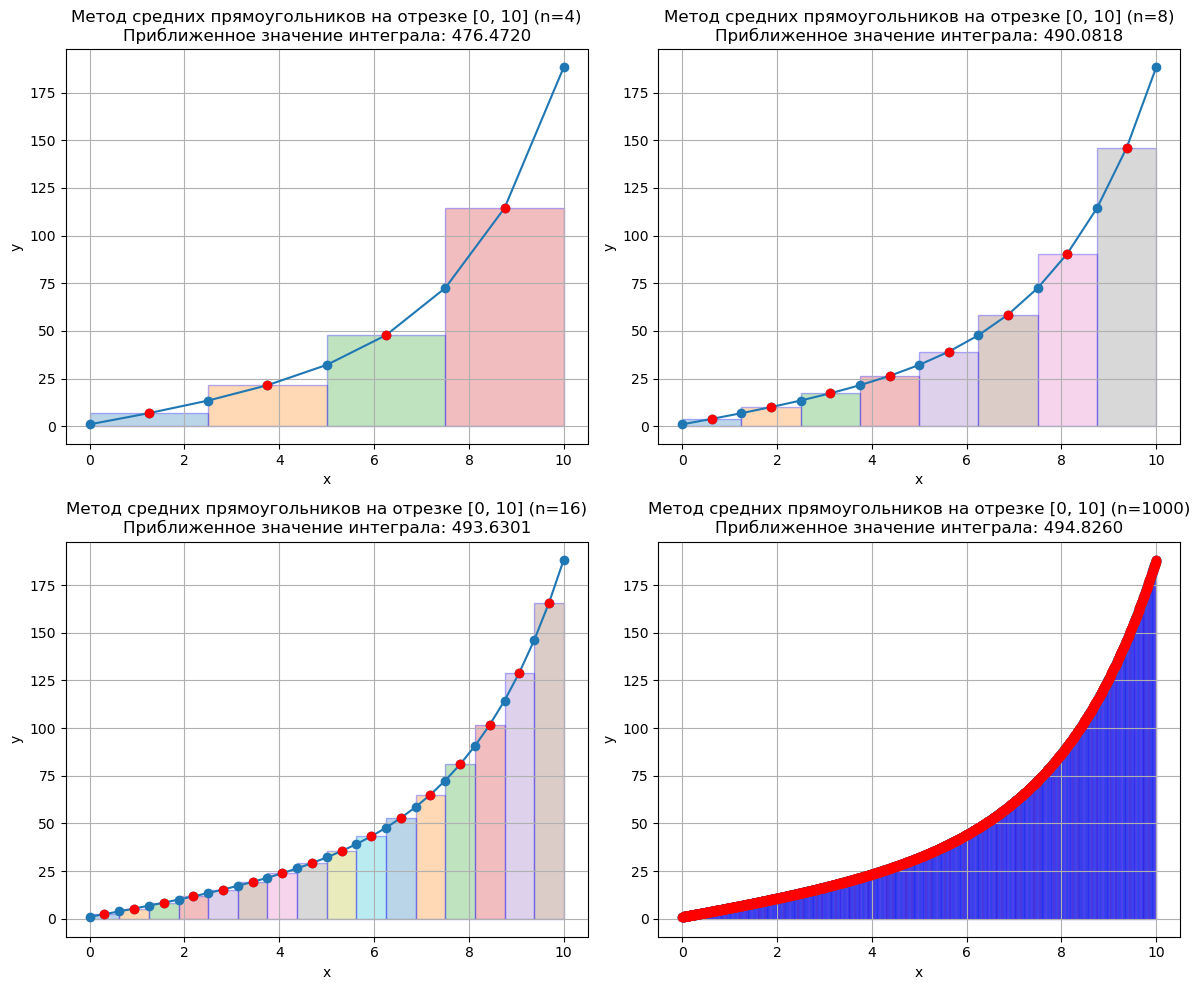

In [49]:
def integral_midpoint_rectangle(f, a, b, n_list, plot=False, **kwargs):
    """
    Метод средних прямоугольников
    :param f: Функция
    :param a: Начало отрезка
    :param b: Конец отрезка
    :param n_list: Список размеров разбиений
    :param plot: Флаг для построения графика
    :param kwargs: Дополнительные параметры для разбиения
    :return: Список приближённых значений интеграла для каждого n
    """
    result = []
    if plot:
        plt.figure(figsize=(12, 10))

    for n in n_list:
        x = get_partition(a, b, n, **kwargs)
        if plot:
            x_plot = list(x)
        integral = 0
        for i in range(n):
            integral += f((x[i] + x[i + 1]) / 2) * (x[i + 1] - x[i])
            if plot:
                x_plot.append((x[i] + x[i + 1]) / 2)
        result.append(integral)
        if plot:
            x_plot.sort()
            plt.subplot(2, 2, n_list.index(n) + 1)
            plt.plot(x_plot, f(np.array(x_plot)), 'o-')
            for i in range(n):
                x_left = x[i]
                x_right = x[i + 1]
                y_val = f((x_left + x_right) / 2)
                X_rect = [x_left, x_right, x_right, x_left, x_left]
                Y_rect = [0, 0, y_val, y_val, 0]
                plt.fill(X_rect, Y_rect, alpha=0.3, edgecolor='b')
                plt.plot((x_left + x_right) / 2, y_val, 'ro')
            plt.title(f"Метод средних прямоугольников на отрезке [{a}, {b}] (n={n})\n"
                      f"Приближенное значение интеграла: {integral:.4f}")
            plt.xlabel("x")
            plt.ylabel("y")
            plt.grid()
    if plot:
        plt.tight_layout()
    return result


result_mid_test = integral_midpoint_rectangle(f, a_test, b_test, n_list, plot=True)